Data Source - http://www.stat.ufl.edu/~winner/datasets.html (Links to an external site.)
Data Set - http://www.stat.ufl.edu/~winner/data/airq402.dat
Data Description - http://www.stat.ufl.edu/~winner/data/airq402.txt (Links to an external site.)
 
Exercise Expectations/Steps -
1.	Import the data and assign appropriate column names.
2.	Drop the variables which has textual information (categorical variables)
3.	Convert all the variable’s datatype to Integer 
4.	Remove all the outliers from the data using IQR method (Retain data points within 1.5 * IQR) 
5.	Print the correlation matrix. 
6.	Treat “Average Fare” –  as your Dependent Variable and the variable which has the highest correlation with Average Fare as the Independent Variable. Drop all the other variables 
7.	Create Scatter Plot of Independent Variable Vs Dependent Variable.
8.	Divide the data set into training and test data set and build a Linear Regression model. 
9.	Print the train and test accuracy of the model.
10.	Print the coefficient and the intercept of the model.


In [84]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon,ttest_rel
from statsmodels.stats.power import ttest_power

In [85]:
#1.	Import the data and assign appropriate column names.
data=pd.read_csv('airdata.csv')

In [86]:
data.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [87]:
# 2.	Drop the variables which has textual information (categorical variables)
# 3.	Convert all the variable’s datatype to Integer 
data = data.drop(['City1','City2','market leading airline','Low price airline'],axis=1)
data['Average Fare'] = data['Average Fare'].astype(int)
data['Distance'] = data['Distance'].astype(int)
data['Average Weekly Passengers'] = data['Average weekly passengers'].astype(int)
data['Market Share'] = data['market share'].astype(int)
data['Average Fare1'] = data['Average fare'].astype(int)
data['Market Share'] = data['market share'].astype(int)
data['Market Share1'] = data['market share.1'].astype(int)
data['Price'] = data['price'].astype(int)

In [88]:
data = data.drop(['Average fare','Average weekly passengers','market share','price','market share.1'],axis=1)
data.head()

,Average Fare,Distance,Average Weekly Passengers,Market Share,Average Fare1,Market Share1,Price
0,114,528,424,70,111,70,111
1,122,860,276,75,123,17,118
2,214,852,215,78,223,2,167
3,69,288,606,96,68,96,68
4,158,723,313,39,161,15,145


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Average Fare                 1000 non-null int32
Distance                     1000 non-null int32
Average Weekly Passengers    1000 non-null int32
Market Share                 1000 non-null int32
Average Fare1                1000 non-null int32
Market Share1                1000 non-null int32
Price                        1000 non-null int32
dtypes: int32(7)
memory usage: 27.4 KB


In [91]:
#4.	Remove all the outliers from the data using IQR method (Retain data points within 1.5 * IQR) 
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    #print(df_out)
    return df_out

In [57]:
data['Average Fare']=remove_outlier(data,'Average Fare')
data['Distance']=remove_outlier(data,'Distance')
data['Average Weekly Passengers']=remove_outlier(data,'Average Weekly Passengers')
data['Market Share']=remove_outlier(data,'Market Share')
data['Average Fare1']=remove_outlier(data,'Average Fare1')
data['Market Share1']=remove_outlier(data,'Market Share1')
data['Price']=remove_outlier(data,'Price')

In [92]:
data=remove_outlier(data,'Average Fare')
data=remove_outlier(data,'Distance')
data=remove_outlier(data,'Average Weekly Passengers')
data=remove_outlier(data,'Market Share')
data=remove_outlier(data,'Average Fare1')
data=remove_outlier(data,'Market Share1')
data=remove_outlier(data,'Price')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877 entries, 0 to 999
Data columns (total 7 columns):
Average Fare                 877 non-null int32
Distance                     877 non-null int32
Average Weekly Passengers    877 non-null int32
Market Share                 877 non-null int32
Average Fare1                877 non-null int32
Market Share1                877 non-null int32
Price                        877 non-null int32
dtypes: int32(7)
memory usage: 30.8 KB


In [94]:
data.head()

,Average Fare,Distance,Average Weekly Passengers,Market Share,Average Fare1,Market Share1,Price
0,114,528,424,70,111,70,111
1,122,860,276,75,123,17,118
2,214,852,215,78,223,2,167
3,69,288,606,96,68,96,68
4,158,723,313,39,161,15,145


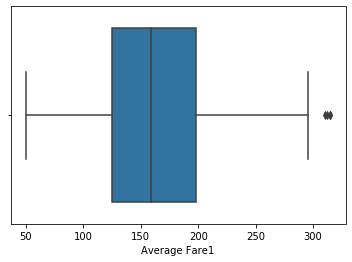

In [95]:
sns.boxplot(data['Average Fare1'])

In [96]:
#5.	Print the correlation matrix. 
data.corr()

,Average Fare,Distance,Average Weekly Passengers,Market Share,Average Fare1,Market Share1,Price
Average Fare,1.000000,0.512216,-0.194766,-0.202173,0.979764,-0.498469,0.837312
Distance,0.512216,1.000000,-0.123027,-0.545426,0.480058,-0.361256,0.531825
Average Weekly Passengers,-0.194766,-0.123027,1.000000,0.019110,-0.160618,0.074929,-0.206008
Market Share,-0.202173,-0.545426,0.019110,1.000000,-0.188859,0.279923,-0.309300
Average Fare1,0.979764,0.480058,-0.160618,-0.188859,1.000000,-0.522893,0.790606
Market Share1,-0.498469,-0.361256,0.074929,0.279923,-0.522893,1.000000,-0.261949
Price,0.837312,0.531825,-0.206008,-0.309300,0.790606,-0.261949,1.000000


In [97]:
#6.	Treat “Average Fare” –  as your Dependent Variable and the variable which has the highest correlation with Average Fare as the Independent Variable. Drop all the other variables 
data['Average Fare']=data['Average Fare'].fillna(data['Average Fare'].mean())
data['Distance']=data['Distance'].fillna(data['Distance'].mean())
data['Average Weekly Passengers']=data['Average Weekly Passengers'].fillna(data['Average Weekly Passengers'].mean())
data['Market Share']=data['Market Share'].fillna(data['Market Share'].mean())
data['Average Fare1']=data['Average Fare1'].fillna(data['Average Fare1'].mean())
data['Market Share1']=data['Market Share1'].fillna(data['Market Share1'].mean())
data['Price']=data['Price'].fillna(data['Price'].mean())

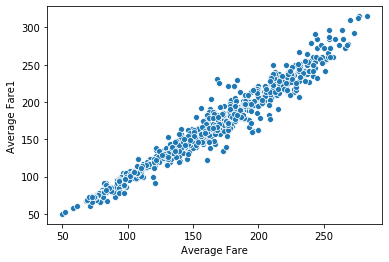

In [98]:
#7.	Create Scatter Plot of Independent Variable Vs Dependent Variable.
sns.scatterplot(x=data['Average Fare'],y=data['Average Fare1'])

In [107]:
#8.	Divide the data set into training and test data set and build a Linear Regression model. 
a = ['Average Fare']
train = data[a]
b = ['Average Fare1']
test = data[b]

In [108]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.4, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(526, 1)
(526, 1)
(351, 1)
(351, 1)


In [109]:
#9.	Print the train and test accuracy of the model.
from sklearn.metrics import accuracy_score
accuracy_score(x_train,y_train)

0.07034220532319392

In [110]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
#10.	Print the coefficient and the intercept of the model.
regressor.intercept_

array([-10.93179445])

In [112]:
regressor.coef_

array([[1.08867126]])